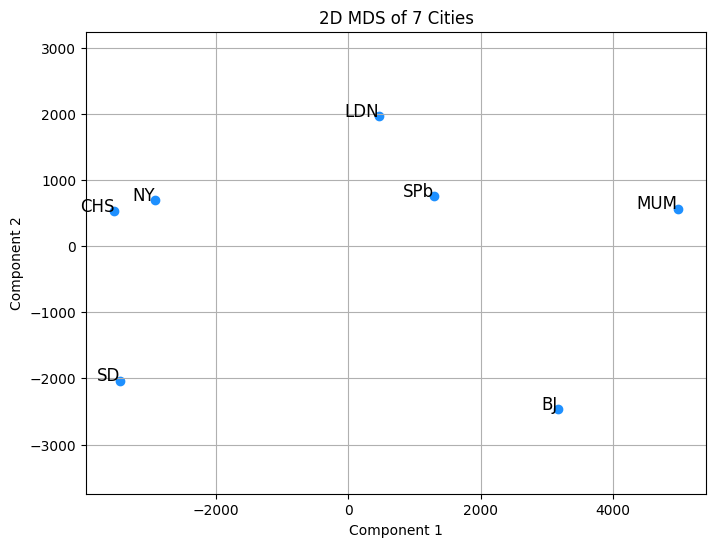

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def mds(D, k=2):
    """
    Classical MDS implementation.
    
    Parameters:
    - D: (N x N) numpy array representing the distance matrix
    - k: desired dimension of output space

    Returns:
    - X_k: (N x k) coordinates in k-dimensional space
    """
    # Step 1: Convert distances to squared distances
    D_squared = D ** 2

    # Step 2: Compute the centering matrix H
    N = D.shape[0]
    I = np.eye(N)
    e = np.ones((N, 1))
    H = I - (1/N) * e @ e.T

    # Step 3: Compute the double-centered matrix B = -1/2 * H D^2 H
    B = -0.5 * H @ D_squared @ H

    # Step 4: Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(B)

    # Step 5: Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Step 6: Take top k eigenvalues/vectors
    L_k = np.diag(np.sqrt(eigvals[:k]))
    U_k = eigvecs[:, :k]

    # Step 7: Return k-dimensional coordinates
    X_k = U_k @ L_k

    return X_k

# Example usage with your 7-city distance matrix (fill in or import as needed)
cities = ['NY', 'BJ', 'SD', 'LDN', 'SPb', 'CHS', 'MUM']
D = np.array([
    [0.0,    6826.2, 2427.2, 3459.5, 4276.2,  635.0, 7791.3],
    [6826.2, 0.0,    6362.0, 5079.9, 3765.3, 7298.5, 2951.8],
    [2427.2, 6362.0, 0.0,    5479.9, 5335.0, 2150.0, 8799.7],
    [3459.5, 5079.9, 5479.9, 0.0,    1300.8, 4066.0, 4460.0],
    [4276.2, 3765.3, 5335.0, 1300.8, 0.0,    4911.2, 3515.3],
    [635.0,  7298.5, 2150.0, 4066.0, 4911.2, 0.0,    8426.1],
    [7791.3, 2951.8, 8799.7, 4460.0, 3515.3, 8426.1, 0.0]
])

# Project into 2D
X_2d = mds(D, k=2)

# Plotting the result
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c='dodgerblue')
for i, city in enumerate(cities):
    plt.text(X_2d[i, 0], X_2d[i, 1], city, fontsize=12, ha='right')
plt.title('2D MDS of 7 Cities')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.axis('equal')
plt.grid(True)
plt.show()


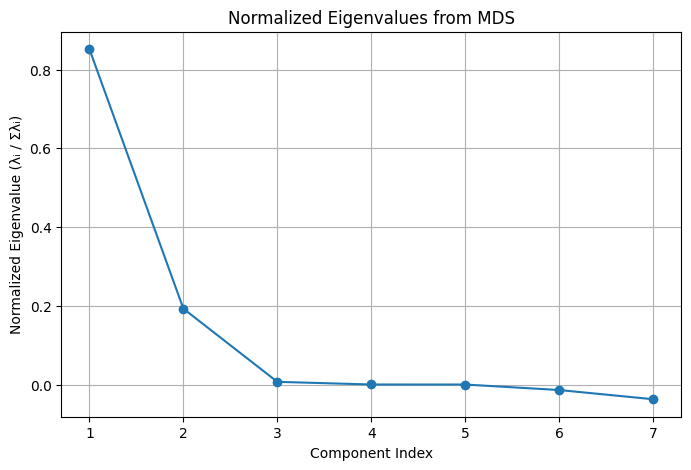

Sorted eigenvalues:
[ 6.96458245e+07  1.57520773e+07  5.61017855e+05  9.18528564e+03
  3.14103087e-09 -1.14147967e+06 -3.05087987e+06]

⚠️ Negative eigenvalues detected:
[-1141479.66644368 -3050879.86774316]

Explanation:
Negative eigenvalues may arise due to:
- Numerical errors (e.g., rounding, finite precision)
- The input distance matrix is not Euclidean (violates triangle inequality)


In [5]:

# Step 1: Square the distance matrix
D_squared = D ** 2

# Step 2: Create centering matrix
N = D.shape[0]
I = np.eye(N)
e = np.ones((N, 1))
H = I - (1 / N) * e @ e.T

# Step 3: Compute the double-centered matrix B
B = -0.5 * H @ D_squared @ H

# Step 4: Eigenvalue decomposition (since B is symmetric)
eigvals, eigvecs = np.linalg.eigh(B)

# Step 5: Sort eigenvalues in descending order
eigvals_sorted = np.sort(eigvals)[::-1]
eigvals_normalized = eigvals_sorted / np.sum(eigvals_sorted)

# Step 6: Plot normalized eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(range(1, N + 1), eigvals_normalized, marker='o')
plt.title('Normalized Eigenvalues from MDS')
plt.xlabel('Component Index')
plt.ylabel('Normalized Eigenvalue (λᵢ / Σλᵢ)')
plt.grid(True)
plt.xticks(range(1, N + 1))
plt.show()

# Step 7: Analyze negative eigenvalues
print("Sorted eigenvalues:")
print(eigvals_sorted)

negative_eigenvalues = eigvals_sorted[eigvals_sorted < 0]
if len(negative_eigenvalues) > 0:
    print("\n⚠️ Negative eigenvalues detected:")
    print(negative_eigenvalues)
    print("\nExplanation:")
    print("Negative eigenvalues may arise due to:")
    print("- Numerical errors (e.g., rounding, finite precision)")
    print("- The input distance matrix is not Euclidean (violates triangle inequality)")
else:
    print("\n✅ No negative eigenvalues detected.")

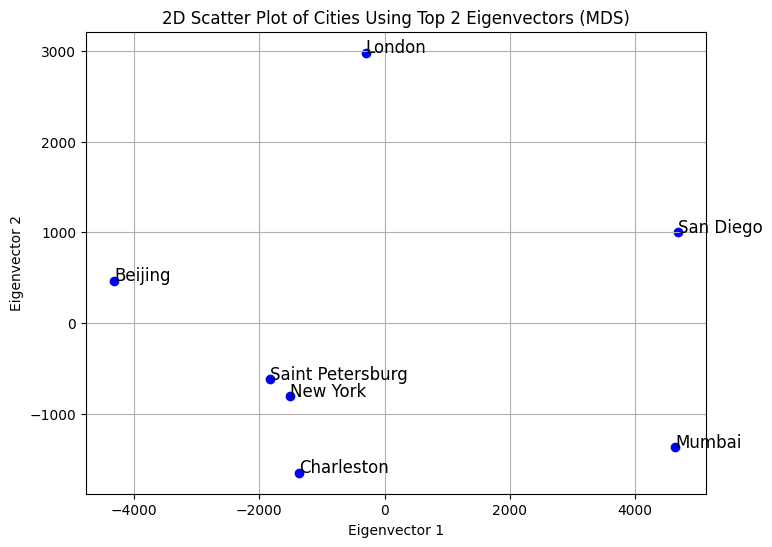

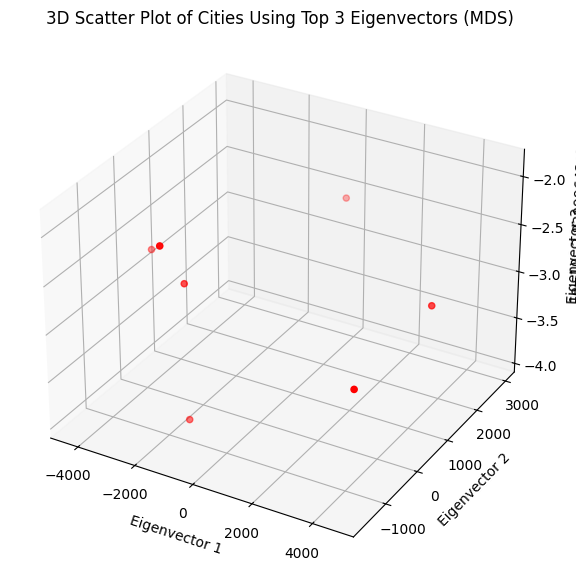

In [7]:
# Choose the top 2 eigenvectors for 2D visualization (you can choose 3 for 3D)
k = 3  # Use 2 dimensions for 2D plot

# Eigenvectors are ordered in the same way as eigenvalues, so the top k eigenvectors correspond to the largest k eigenvalues
top_eigenvectors = eigvecs[:, :k]

# Step 9: Scale the eigenvectors by the square root of the eigenvalues (λᵢ ^ 0.5)
top_eigenvectors_scaled = top_eigenvectors * np.sqrt(eigvals_sorted[:k])

# Step 10: Create the new coordinates (Y matrix)
Y = top_eigenvectors_scaled.T  # Y will have shape (k, N)

# Step 11: Plot the cities in the 2D or 3D space
cities = ["New York", "Beijing", "San Diego", "London", "Saint Petersburg", "Charleston", "Mumbai"]

# 2D Plot (using top 2 eigenvectors)
plt.figure(figsize=(8, 6))
plt.scatter(Y[0, :], Y[1, :], color='b', marker='o')

# Label each point with the city name
for i, city in enumerate(cities):
    plt.text(Y[0, i] + 0.1, Y[1, i] + 0.1, city, fontsize=12)

plt.title("2D Scatter Plot of Cities Using Top 2 Eigenvectors (MDS)")
plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")
plt.grid(True)
plt.show()

# Optionally, create a 3D plot (if you want to visualize the top 3 eigenvectors)
# Choose k = 3 for 3D visualization
if k == 3:
    top_eigenvectors_3d = eigvecs[:, :3]
    top_eigenvectors_scaled_3d = top_eigenvectors_3d * np.sqrt(eigvals_sorted[:3])
    Y_3d = top_eigenvectors_scaled_3d.T  # Y_3d will have shape (3, N)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Y_3d[0, :], Y_3d[1, :], Y_3d[2, :], color='r', marker='o')

    # Label each point with the city name
    for i, city in enumerate(cities):
        ax.text(Y_3d[0, i] + 0.1, Y_3d[1, i] + 0.1, Y_3d[2, i] + 0.1, city, fontsize=12)

    ax.set_title("3D Scatter Plot of Cities Using Top 3 Eigenvectors (MDS)")
    ax.set_xlabel("Eigenvector 1")
    ax.set_ylabel("Eigenvector 2")
    ax.set_zlabel("Eigenvector 3")
    plt.show()